Nonlinear dimensionality reduction algorithms

*   Non-parametric
  *   UMAP
  *   t-SNE
  * Large vis
*   Parametric


1. Computing probabilities in $\textbf{x}$

The firts step is to compute a distribution of probabilities $p$ between pairs of points in $\textbf{x}$ based on the distances between points in data space

$$ p_{j|i} = \exp \left( - \frac{d(\textbf{x}_i, \textbf{x}_j) - ρ_i}{\sigma_i} \right)  $$

- $d(\textbf{x}_i, \textbf{x}_j)$ represents the distance between $\textbf{x}_i$ and $\textbf{x}_j$  

- $\sigma_i$ is the standard desviation for the gaussian distribution

- $\rho_i$ is a local connectivity parameter set the distance from $\textbf{x}_i$ upon its $K$ nearest neighbors

- $K$ is a hyperparameter

2. Graph embewdding

UMAP initilize an embedding in $\textbf{z}$ corresponding to each data point, where a probability distribution $(Q)$ is computed between points as was done with the distribution $(P)$ in the input space

$$q_{ij} = (1 + a || \textbf{z}_i - \textbf{z}_j ||^{2b})^{-1}$$

where a and b are hyperparameters set based on a desired minimum distance between points in embedding space

Cost function

$$C = \underbrace{\sum_{ij} P_{ij} \log \left( \frac{P_{ij}}{q_{ij}} \right)}_{Attraction} + \underbrace{\left( 1 - P_{ij} \right) \log \left( \frac{1-P_{ij}}{1-q_{ij}} \right)}_{Repulsion} $$

#**Configuration GPU**

In [2]:
!nvidia-smi

Wed May  1 19:55:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 476 (delta 141), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (476/476), 131.59 KiB | 4.39 MiB/s, done.
Resolving deltas: 100% (243/243), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.1 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.4.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.3/473.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 1.2 

#**Load libraries**

In [4]:
import cuml
import cudf
import os.path
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist

from cuml.manifold.umap import UMAP as cuUMAP

In [5]:
(train_images, y_train), (test_images, y_test) = mnist.load_data()

X_train = np.reshape(train_images, (len(train_images), -1))
X_test = np.reshape(test_images, (len(test_images), -1))


11490434/11490434 [==============================] - 0s 0us/step


In [6]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

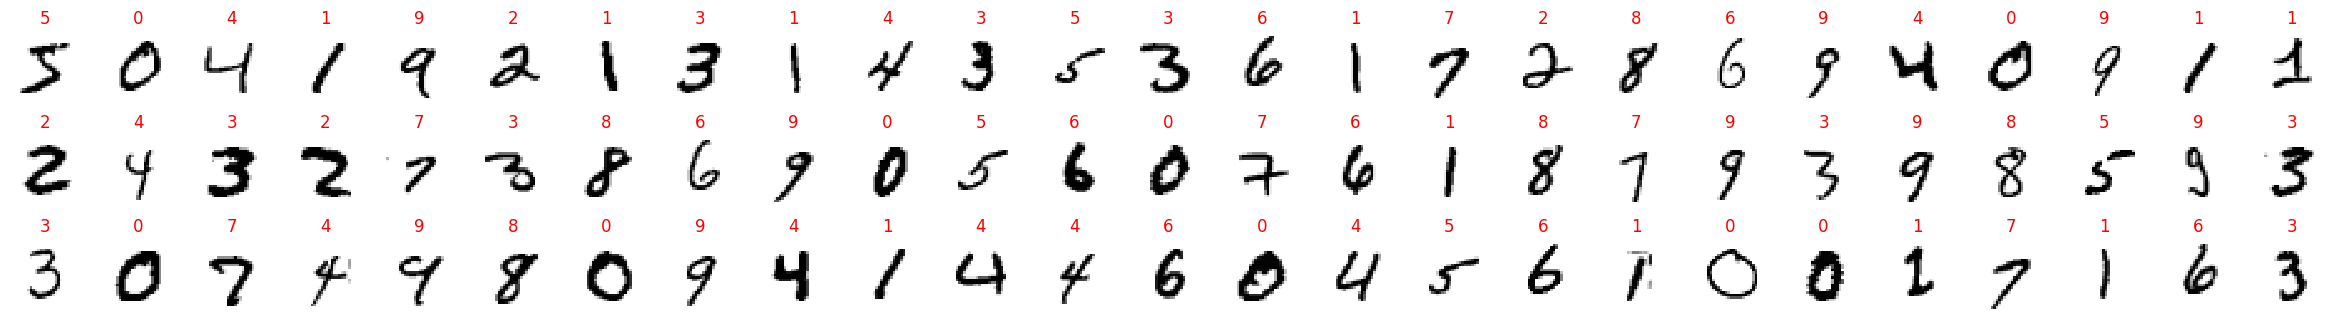

In [7]:
n_rows = 3
n_cols = 25
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(train_images[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12, c='r')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [8]:
umap = cuUMAP(n_components=2, n_neighbors=60, min_dist=0.0, random_state=42, hash_input=True).fit(X_train)


In [9]:
type(umap)

cuml.manifold.umap.UMAP

In [10]:
embedding = umap.transform(X_test)

In [11]:
type(embedding)

numpy.ndarray

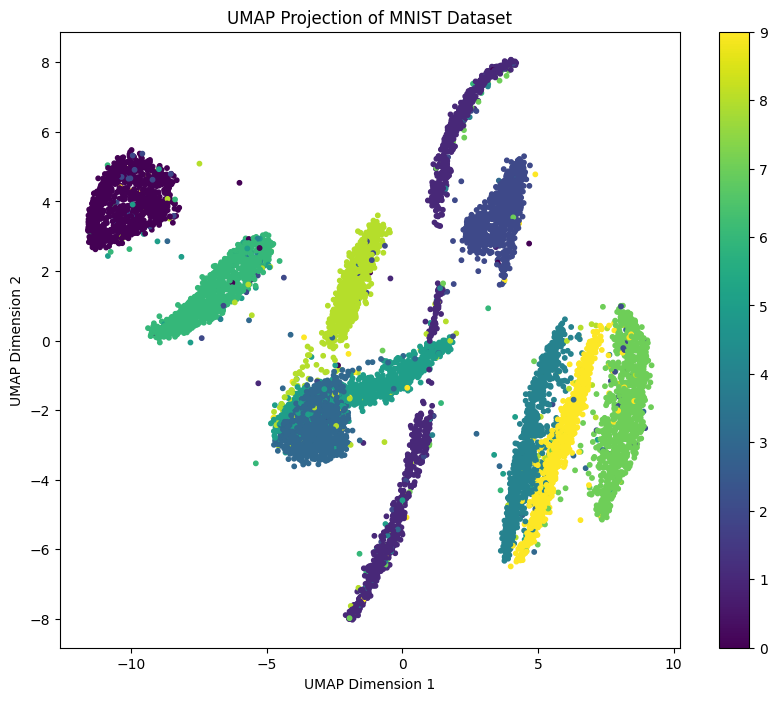

In [12]:
# Visualización del resultado
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_test.astype(int), cmap='viridis', s=10)
plt.title('UMAP Projection of MNIST Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar()
plt.show()